Machine Learning:Linear regression:one various ; predict price for each manufactory

In [5]:
import pandas as pd

car_top7=pd.read_csv("../Resources/car_top7.csv")

In [6]:
car_top7.head()

,Unnamed: 0,manufactory,year,selling_price,fuel,seller_type,mileage
0,24,Tata,2018,500000,Petrol,Individual,20.3 kmpl
1,29,Maruti,2018,254999,Petrol,Individual,16.8 kmpl
2,33,Hyundai,2018,730000,Petrol,Individual,18.6 kmpl
3,35,Maruti,2019,330000,CNG,Individual,33.44 km/kg
4,36,Maruti,2019,366000,Petrol,Individual,23.95 kmpl


C:\Users\weiti\anaconda3\envs\mlenv\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


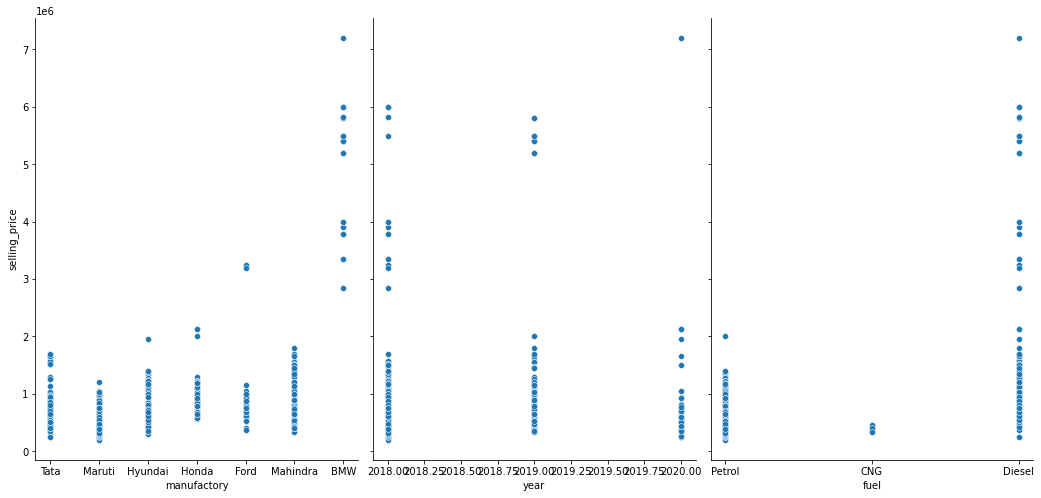

In [7]:
import seaborn as sns
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(car_top7, x_vars=["manufactory","year","fuel"], y_vars="selling_price", size=7, aspect=0.7)

In [8]:
#column:manufatory and fuel label as number
from sklearn import preprocessing

le=preprocessing.LabelEncoder()
car_top7["manufactory"]=le.fit_transform(car_top7["manufactory"])

car_top7

,Unnamed: 0,manufactory,year,selling_price,fuel,seller_type,mileage
0,24,6,2018,500000,Petrol,Individual,20.3 kmpl
1,29,5,2018,254999,Petrol,Individual,16.8 kmpl
2,33,3,2018,730000,Petrol,Individual,18.6 kmpl
3,35,5,2019,330000,CNG,Individual,33.44 km/kg
4,36,5,2019,366000,Petrol,Individual,23.95 kmpl
...,...,...,...,...,...,...,...
1137,8088,5,2018,390000,Petrol,Individual,20.51 kmpl
1138,8097,1,2018,880000,Diesel,Individual,23.0 kmpl
1139,8100,6,2018,800000,Diesel,Individual,21.5 kmpl
1140,8109,1,2018,750000,Diesel,Individual,24.4 kmpl


In [9]:
le.inverse_transform([0,1,2,3,4,5,6])

array(['BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti', 'Tata'],
      dtype=object)

In [10]:
car_top7["fuel"]=le.fit_transform(car_top7["fuel"])

In [11]:
le.inverse_transform([0,1,2])

array(['CNG', 'Diesel', 'Petrol'], dtype=object)

In [12]:
car_top7.head()

,Unnamed: 0,manufactory,year,selling_price,fuel,seller_type,mileage
0,24,6,2018,500000,2,Individual,20.3 kmpl
1,29,5,2018,254999,2,Individual,16.8 kmpl
2,33,3,2018,730000,2,Individual,18.6 kmpl
3,35,5,2019,330000,0,Individual,33.44 km/kg
4,36,5,2019,366000,2,Individual,23.95 kmpl


In [13]:
car_drop=car_top7[["manufactory","year","selling_price","fuel"]]

car_drop

,manufactory,year,selling_price,fuel
0,6,2018,500000,2
1,5,2018,254999,2
2,3,2018,730000,2
3,5,2019,330000,0
4,5,2019,366000,2
...,...,...,...,...
1137,5,2018,390000,2
1138,1,2018,880000,1
1139,6,2018,800000,1
1140,1,2018,750000,1


# Logistic Regression

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [15]:
y = car_drop.selling_price
X = car_drop.drop(columns="selling_price")

In [16]:

 X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)  


In [17]:
 classifier = LogisticRegression(solver='lbfgs',
 multi_class='auto',max_iter=1000,
 random_state=1)

In [18]:
classifier.fit(X_train, y_train)

C:\Users\weiti\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(max_iter=1000, random_state=1)

In [19]:
y_pred = classifier.predict(X_test)

In [21]:

#test index=0 2018year, Tata, Petrol, car price=500,000
classifier.predict([[6,2018,2]])

C:\Users\weiti\anaconda3\envs\mlenv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([600000], dtype=int64)

# Random Forest Regressor

In [22]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
# Create a Random Forest Regressor
reg_Forest = RandomForestRegressor()
# Train the model using the training sets 
reg_Forest.fit(X_train, y_train)
# Model prediction on train data
y_pred_Forest = reg_Forest.predict(X_test)

# print(accuracy_score(y_test_F, y_pred_Forest))

In [23]:
#test index=0 2018year, Tata, Petrol, car price=500,000
reg_Forest.predict([[6,2018,2]])

C:\Users\weiti\anaconda3\envs\mlenv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([536520.22503085])

# XGBoost Regressor

In [24]:
import xgboost

In [25]:
# Import XGBoost Regressor
from xgboost import XGBRegressor
#Create a XGBoost Regressor
XG_reg = XGBRegressor()
# Train the model using the training sets 
XG_reg.fit(X_train, y_train)
print(XG_reg.score(X_train, y_train))

0.9576348749928149


In [26]:
y_pred_XG = XG_reg.predict(X_test)
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test, y_pred_XG)
print("MSE:",mse)

MSE: 97240522979.66739


In [27]:
print(X_test)

      manufactory  year  fuel
314             5  2019     2
589             4  2018     2
636             3  2019     2
959             5  2019     2
1139            6  2018     1
...           ...   ...   ...
602             1  2018     1
891             1  2018     1
1080            3  2019     2
537             4  2019     1
215             5  2018     2

[286 rows x 3 columns]


In [28]:
test = {'manufactory': [6],
        'year': [2018],
        'fuel':[2]
        }

df = pd.DataFrame(test)
df

,manufactory,year,fuel
0,6,2018,2


In [29]:
#test index=0 2018year, Tata, Petrol, car price=500,000
XG_reg.predict(df)

array([535999.8], dtype=float32)

# Accuracy

In [31]:
print("LogisticRegression Traning Accuracy:", classifier.score(X_train, y_train))
print("LogisticRegression Test Accuracy:", classifier.score(X_test, y_test))

print("RandomForestRegressor Traning Accuracy:", reg_Forest.score(X_train, y_train))
print("RandomForestRegressor Test Accuracy:", reg_Forest.score(X_test, y_test))

print("XGBoost Traning Accuracy:", XG_reg.score(X_train, y_train))
print("XGBoost Testing Accuracy:", XG_reg.score(X_test, y_test))


LogisticRegression Traning Accuracy: 0.14953271028037382
LogisticRegression Test Accuracy: 0.11888111888111888
RandomForestRegressor Traning Accuracy: 0.9570176576372567
RandomForestRegressor Test Accuracy: 0.9417453123435225
XGBoost Traning Accuracy: 0.9576348749928149
XGBoost Testing Accuracy: 0.940167632807233
